11

Is there any content about girls?
Yes, all the provided images are about girls with different characteristics like hair color, eye color, and accessories like cat ears.
{'image_path': '/Users/yangming/code/python/RAG/imgs/cry.png'}
{'image_path': '/Users/yangming/code/python/RAG/imgs/bkg.png'}
{'image_path': '/Users/yangming/code/python/RAG/imgs/miao.png'}
{'image_path': '/Users/yangming/code/python/RAG/imgs/angry.png'}


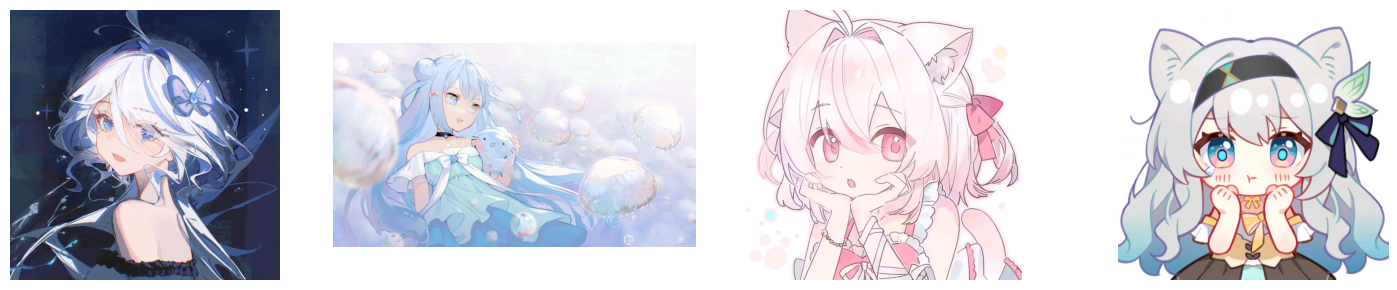

In [18]:
import os
import sys
from langchain_community.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain.chains import RetrievalQA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# from langchain_community.chains import RetrievalQA


dir = "./database/"

# 连接数据库
db = Chroma(persist_directory=dir, embedding_function=OpenAIEmbeddings())

print(db._collection.count())
question = "Is there any content about girls?"

# docs = db.similarity_search(question, k=3)
# print(len(docs))
# for doc in docs:
#     print(doc.page_content)


llm = ChatOpenAI(temperature=0)
qa = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=db.as_retriever(),
    return_source_documents=True,
)

ans = qa.invoke(question)

# print(ans)
print()
print(ans["query"])
print(ans["result"])

for doc in ans["source_documents"]:
    print(f"{doc.metadata}")


# 设置子图布局
num_images = len(ans["source_documents"])
# 设置子图布局

fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

# 遍历图片路径数组并显示图片
for i, doc in enumerate(ans["source_documents"]):
    # 读取图片并显示在相应的子图中
    image_path=doc.metadata['image_path']
    img = mpimg.imread(image_path)
    axes[i].imshow(img)
    axes[i].axis("off")

# 调整子图间距
plt.tight_layout()

# 显示图片
plt.show()